In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("../data/raw/train.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

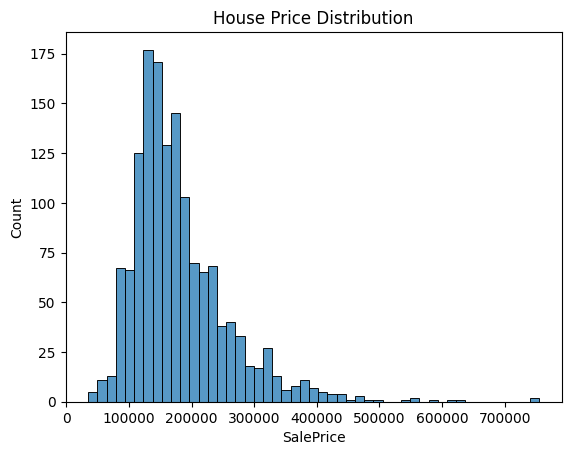

In [11]:
# Basic info
print(df.info())
print(df.describe())

# Plot distributions
sns.histplot(df["SalePrice"])
plt.title("House Price Distribution")
plt.savefig("../reports/figures/price_distribution.png")

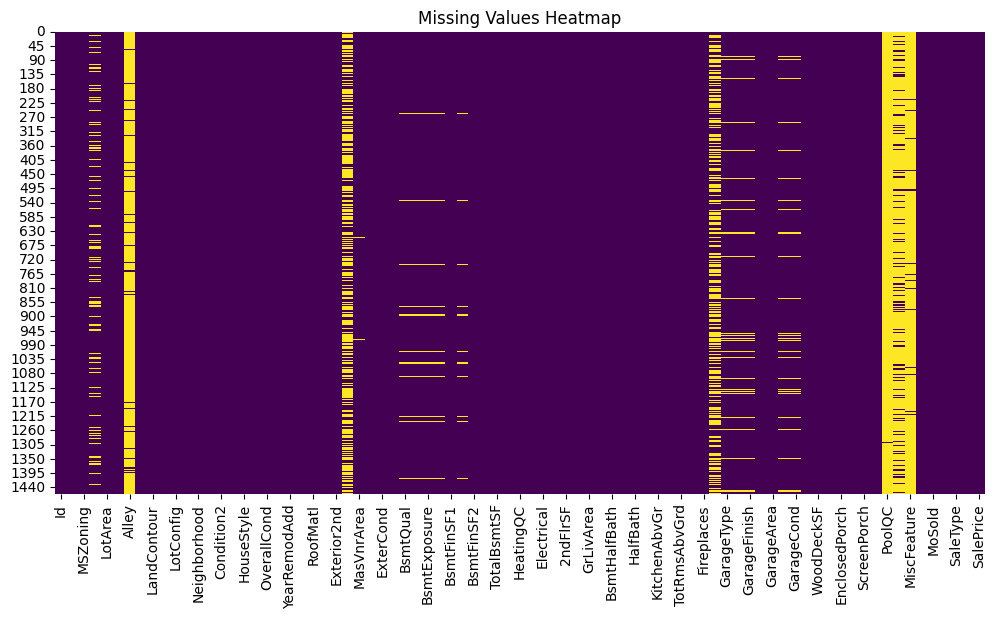

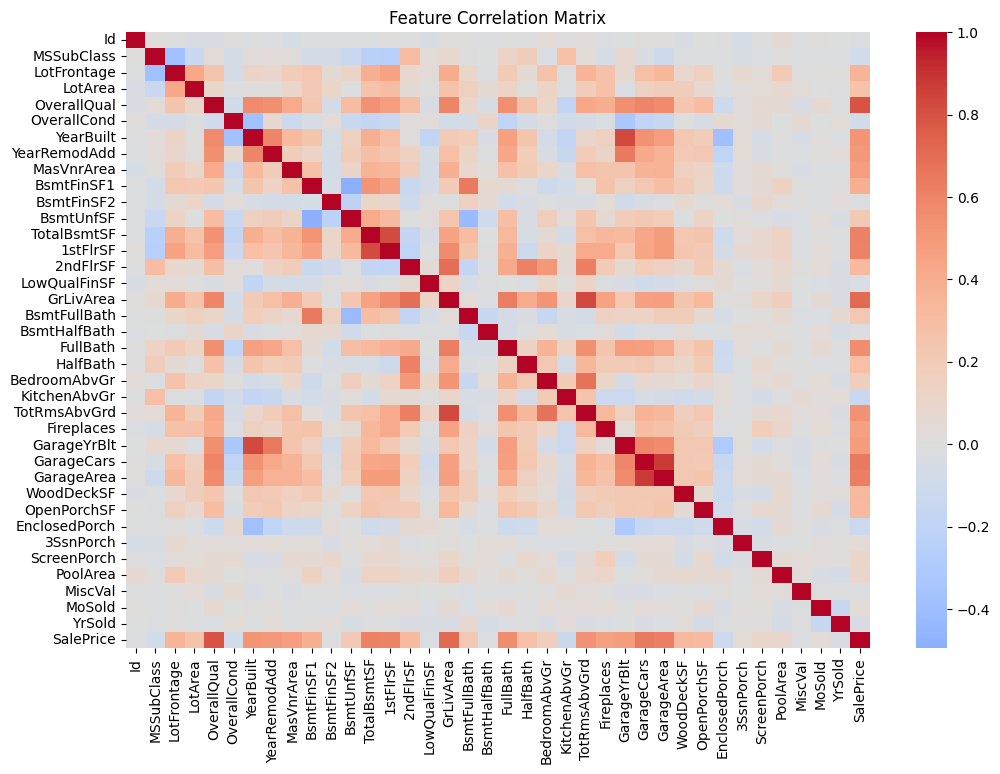

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


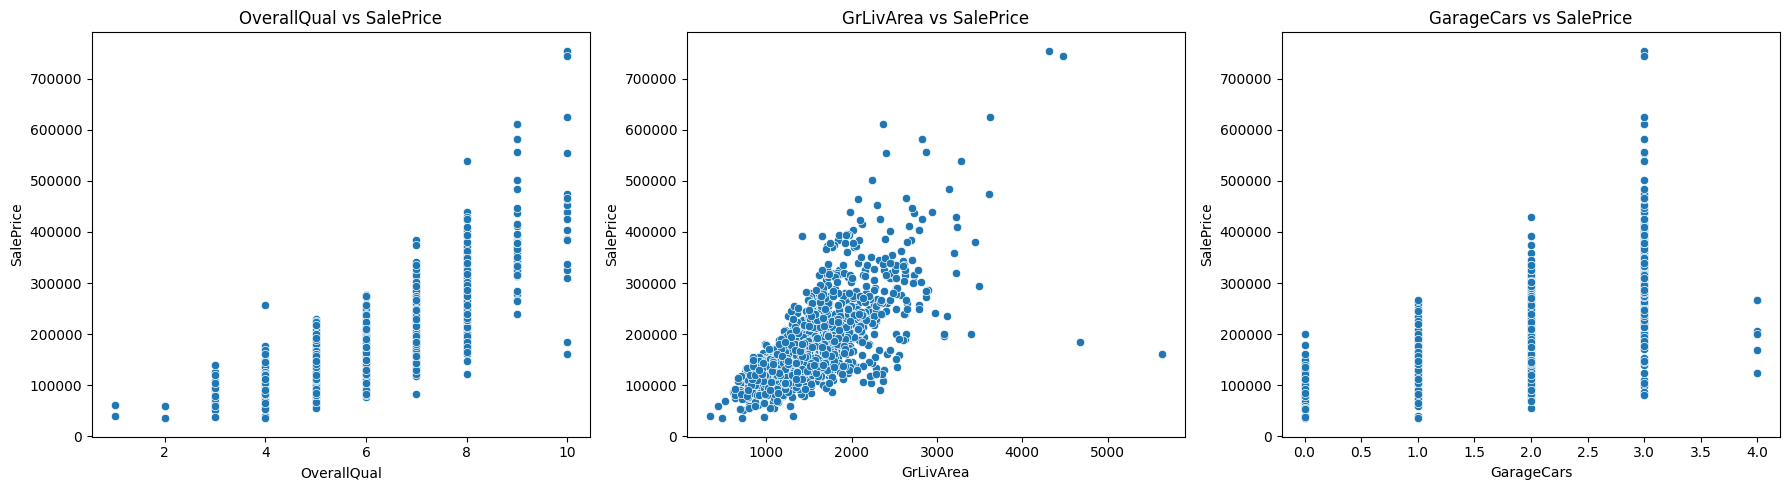

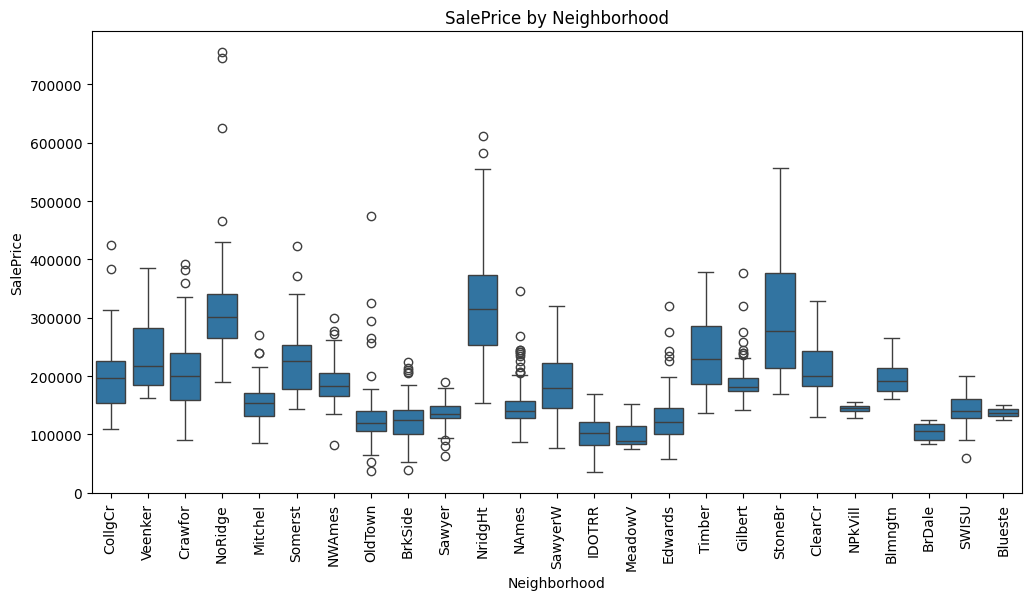

In [12]:
# Missing values heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation matrix (numeric columns only)
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.savefig("../reports/figures/corr_matrix.png")
plt.show()

# Top correlated features with SalePrice
corr_target = corr['SalePrice'].sort_values(ascending=False)
print(corr_target.head(10))

# Scatter plots for top 3 correlated features
top_features = corr_target.index[1:4]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, feature in enumerate(top_features):
    sns.scatterplot(x=df[feature], y=df['SalePrice'], ax=axes[i])
    axes[i].set_title(f'{feature} vs SalePrice')
plt.tight_layout()
plt.savefig("../reports/figures/predictions.png")
plt.show()

# Boxplot for a key categorical feature (e.g., Neighborhood)
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')
plt.show()